In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Filters

In [3]:
train_data['Owner_Type'].value_counts()

Owner_Type
First             3083
Second             589
Third               73
Fourth & Above       5
Name: count, dtype: int64

In [4]:
test_data['Owner_Type'].value_counts()

Owner_Type
First             1026
Second             199
Third               22
Fourth & Above       3
Name: count, dtype: int64

In [5]:
train_data['Fuel_Type'].value_counts()

Fuel_Type
Diesel      1998
Petrol      1751
Electric       1
Name: count, dtype: int64

In [6]:
test_data['Fuel_Type'].value_counts()

Fuel_Type
Diesel      700
Petrol      549
Electric      1
Name: count, dtype: int64

A look at the data

In [7]:
print("This is the given training data")
train_data

This is the given training data


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.0 kmpl,2993 CC,235 bhp,5.0,18.75
3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79 kmpl,2179 CC,120 bhp,7.0,6.25
3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,1.45
3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,6.60


In [8]:
print("This is the given testing data")
test_data

This is the given testing data


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,Hyundai Elantra CRDi SX AT,Delhi,2013,71000,Diesel,Automatic,First,22.7 kmpl,1582 CC,126.2 bhp,5.0,6.80
1246,1246,Hyundai Getz GLS ABS,Pune,2005,91000,Petrol,Manual,Third,16.8 kmpl,1341 CC,83 bhp,5.0,0.80
1247,1247,Volkswagen Polo GT TSI,Coimbatore,2017,50534,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,8.27
1248,1248,Hyundai Verna SX CRDi AT,Pune,2012,83000,Diesel,Automatic,First,19.08 kmpl,1582 CC,126.32 bhp,5.0,6.00


The following function converts a string containing a number into a floating-point number.

In [9]:
def extract(value):
    try:
        return float(value.split()[0])
    except:
        return np.nan

This code applies the extract fn on the data columns and removes any rows with missing values across columns

In [10]:
for i in ['Mileage', 'Engine', 'Power']:
    train_data[i] = train_data[i].apply(extract)
    test_data[i] = test_data[i].apply(extract)
test_data = test_data.dropna()
train_data = train_data.dropna()

In [11]:
train_data['Owner_Type'].value_counts()

Owner_Type
First             3020
Second             561
Third               64
Fourth & Above       4
Name: count, dtype: int64

In [12]:
test_data['Owner_Type'].value_counts()

Owner_Type
First             1009
Second             190
Third               22
Fourth & Above       3
Name: count, dtype: int64

Using the Fuel_Type column to predict prices

In [13]:
train_data['Fuel_Type'].value_counts()

Fuel_Type
Diesel    1962
Petrol    1687
Name: count, dtype: int64

In [14]:
test_data['Fuel_Type'].value_counts()

Fuel_Type
Diesel    689
Petrol    535
Name: count, dtype: int64

It means that the 1 electric fuel type had some missing cells so that training example was dropped

In [15]:
train_data['Fuel_Type'] = train_data['Fuel_Type'].replace({'Petrol': 1, 'Diesel': 0})
train_data.head()
test_data['Fuel_Type'] = test_data['Fuel_Type'].replace({'Petrol': 1, 'Diesel': 0})
test_data.head()

/tmp/ipykernel_3880/3040999097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Fuel_Type'] = train_data['Fuel_Type'].replace({'Petrol': 1, 'Diesel': 0})
/tmp/ipykernel_3880/3040999097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fuel_Type'] = train_data['Fuel_Type'].replace({'Petrol': 1, 'Diesel': 0})
/tmp/ipykernel_3880/3040999097.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,0,Manual,First,23.40,1248.0,74.00,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,1,Automatic,First,16.95,1197.0,78.90,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,1,Manual,First,18.60,1197.0,81.86,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,0,Automatic,First,13.50,2400.0,215.00,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,1,Manual,First,20.36,1197.0,78.90,5.0,2.75


This code stores the specific data columns as inputs and Price as output

In [16]:
train_data['Transmission'] = train_data['Transmission'].replace({'Manual': 1, 'Automatic': 0})
train_data.head()
test_data['Transmission'] = test_data['Transmission'].replace({'Manual': 1, 'Automatic': 0})
test_data.head()

/tmp/ipykernel_3880/4089796340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Transmission'] = train_data['Transmission'].replace({'Manual': 1, 'Automatic': 0})
/tmp/ipykernel_3880/4089796340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Transmission'] = train_data['Transmission'].replace({'Manual': 1, 'Automatic': 0})
/tmp/ipykernel_3880/4089796340.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior,

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,0,1,First,23.40,1248.0,74.00,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,1,0,First,16.95,1197.0,78.90,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,1,1,First,18.60,1197.0,81.86,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,0,0,First,13.50,2400.0,215.00,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,1,1,First,20.36,1197.0,78.90,5.0,2.75


## One-hot Encoding

In [17]:
train_data = pd.get_dummies(train_data, columns=['Owner_Type'], drop_first=True)
train_data.head()
test_data = pd.get_dummies(test_data, columns=['Owner_Type'], drop_first=True)
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,0,1,23.40,1248.0,74.00,5.0,6.95,False,False,False
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,1,0,16.95,1197.0,78.90,5.0,2.90,False,False,False
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,1,1,18.60,1197.0,81.86,5.0,6.28,False,False,False
3,3,Volvo XC60 D5,Pune,2011,106976,0,0,13.50,2400.0,215.00,5.0,13.80,False,False,False
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,1,1,20.36,1197.0,78.90,5.0,2.75,False,False,False


In [18]:
train_data[['Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']] = train_data[['Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']].astype(int)
train_data
test_data[['Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']] = test_data[['Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']].astype(int)
test_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,0,1,23.40,1248.0,74.00,5.0,6.95,0,0,0
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,1,0,16.95,1197.0,78.90,5.0,2.90,0,0,0
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,1,1,18.60,1197.0,81.86,5.0,6.28,0,0,0
3,3,Volvo XC60 D5,Pune,2011,106976,0,0,13.50,2400.0,215.00,5.0,13.80,0,0,0
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,1,1,20.36,1197.0,78.90,5.0,2.75,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,Hyundai Elantra CRDi SX AT,Delhi,2013,71000,0,0,22.70,1582.0,126.20,5.0,6.80,0,0,0
1246,1246,Hyundai Getz GLS ABS,Pune,2005,91000,1,1,16.80,1341.0,83.00,5.0,0.80,0,0,1
1247,1247,Volkswagen Polo GT TSI,Coimbatore,2017,50534,1,0,17.21,1197.0,103.50,5.0,8.27,0,0,0
1248,1248,Hyundai Verna SX CRDi AT,Pune,2012,83000,0,0,19.08,1582.0,126.32,5.0,6.00,0,0,0


# Starting the training of the Model

In [19]:
xf = [ 'Year', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']
X_train = train_data[xf].values
y_train = train_data['Price'].values
X_test = test_data[xf].values
y_test = test_data['Price'].values

The following normalizes the inputs of the model between 0 and 1

In [20]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min) # rescaled using the same values as train model for consistency

This code initializes values for a linear regression model

In [21]:
#seed helps in generating the same random values each time ensuring reproducibility in code
np.random.seed(0)   
weights = np.random.rand(X_train.shape[1]) # assigning weights to every input helps you find how much each input contributes to the ouptut
bias = 0.0 # gets updated during the training
learning_rate = 0.01 # determines how much weights change during training
num_iterations = 10000 # specifies the number of iterations
m = len(y_train) # stores the number of training examples. Training example is a single data point from the training dataset which is used to teach the model 

Gradient Descent code to train the linear regression model

In [22]:
# Gradient Descent with Loss Tracking
loss_history = []

for i in range(num_iterations): # runs for a pre-defined "num_iterations" times
    y_pred = np.dot(X_train, weights) + bias # calculates the predicted output for each training example
    error = y_pred - y_train # calculates the difference between the predicted values and the actual target

    mse_loss = np.mean(error ** 2)
    loss_history.append(mse_loss)
    
    weights_gradient = (2/m) * np.dot(X_train.T, error) # gradient tells us the direction and magnitude to adjust each weight to reduce the error.
    bias_gradient = (2/m) * np.sum(error) # tells how much to change the bais to improve predictions

    weights -= learning_rate * weights_gradient 
    bias -= learning_rate * bias_gradient   

y_test_pred = np.dot(X_test, weights) + bias

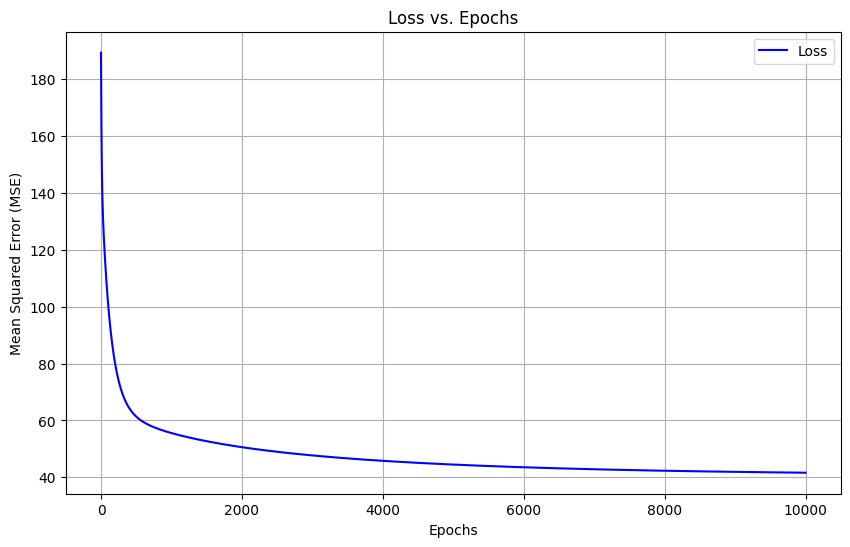

In [23]:
# Plotting the Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, color="b", label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

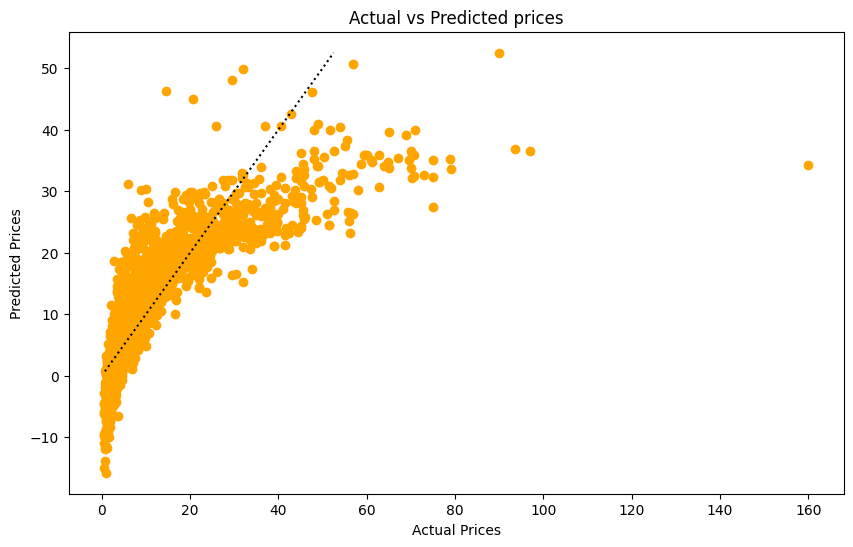

In [24]:
plt.figure(figsize=(10, 6))

# Scatter plot of the actual price vs the pedicted price
plt.scatter(y_train, y_pred, color = 'orange')

# Line plot of the best-fit line (model predictions)
plt.plot([min(y_test), max(y_pred)], [min(y_test), max(y_pred)], 'k:')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices')
plt.show()

Deals with any NaN values in the predicted and the actual outputs

In [25]:
if np.isnan(y_test).any() or np.isnan(y_test_pred).any(): 
    y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train)) 
    y_test_pred = np.nan_to_num(y_test_pred, nan=np.nanmean(y_test_pred))

In [26]:
y_mean = np.mean(y_test)
total = np.sum((y_test - y_mean) ** 2)
residual = np.sum((y_test - y_test_pred) ** 2)
r2 = 1-(residual / total)

In [ ]:
print("R-squared (R²) for Test set:", r2)

R-squared (R²): 0.6739134248243042
